In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e8/sample_submission.csv
/kaggle/input/playground-series-s3e8/train.csv
/kaggle/input/playground-series-s3e8/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [4]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [5]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
pd.unique(df.cut)

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [7]:
pd.unique(df.color)

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [8]:
pd.unique(df.clarity)

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

<AxesSubplot:xlabel='cut', ylabel='count'>

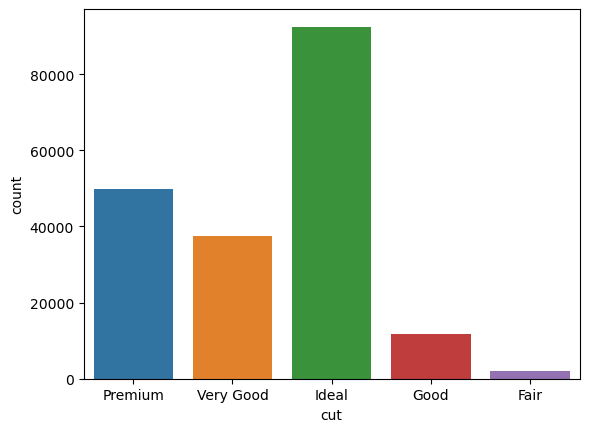

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x=df.cut)

<AxesSubplot:xlabel='color', ylabel='count'>

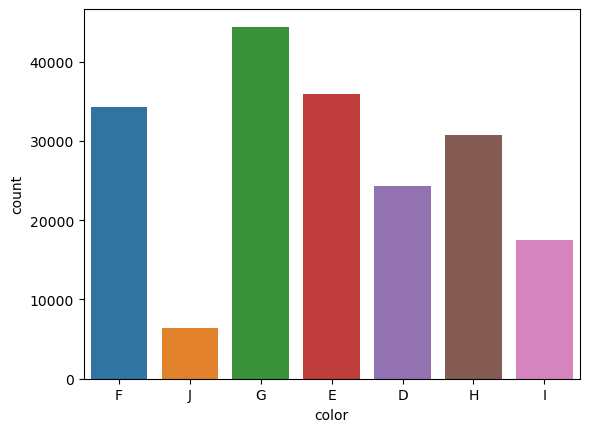

In [10]:
sns.countplot(data=df, x=df.color)

<AxesSubplot:xlabel='clarity', ylabel='count'>

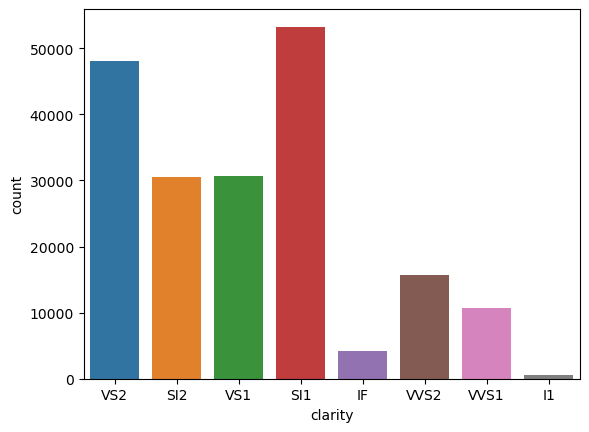

In [11]:
sns.countplot(data=df, x=df.clarity)

In [12]:
df.groupby('cut').mean()

,id,carat,depth,table,x,y,z,price
cut,,,,,,,,
Fair,97790.883721,1.024621,64.272044,58.723751,6.227194,6.180134,3.982068,4810.503216
Good,96307.791000,0.876444,62.813810,58.396610,5.912265,5.922445,3.714830,4191.474101
Ideal,96588.847589,0.697933,61.760363,55.973220,5.491404,5.502262,3.394564,3396.186969
Premium,97110.336566,0.904034,61.431935,58.713683,6.004452,5.986009,3.682804,4797.056482
Very Good,96934.186285,0.829261,62.045935,57.898594,5.793753,5.815559,3.600687,4165.304344


<AxesSubplot:xlabel='depth', ylabel='Count'>

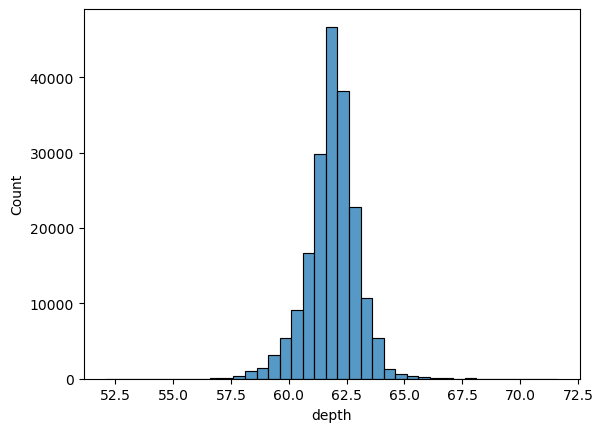

In [13]:
sns.histplot(data=df, x='depth', binwidth=0.5)

<AxesSubplot:xlabel='table', ylabel='Count'>

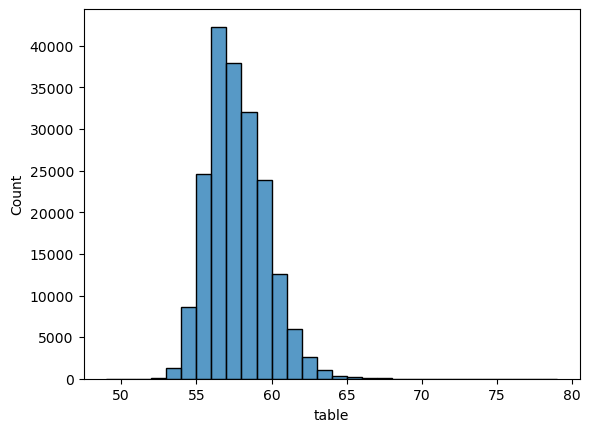

In [14]:
sns.histplot(data=df, x='table', binwidth=1)

<AxesSubplot:xlabel='carat', ylabel='price'>

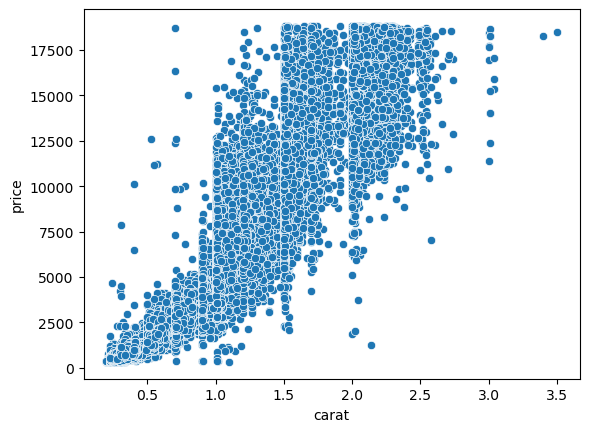

In [15]:
sns.scatterplot(data=df, x='carat', y='price')

**REMOVING OUTLIERS**

In [16]:
colum = df.drop(['cut','color','clarity','id','price'],axis=1).columns
colum

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

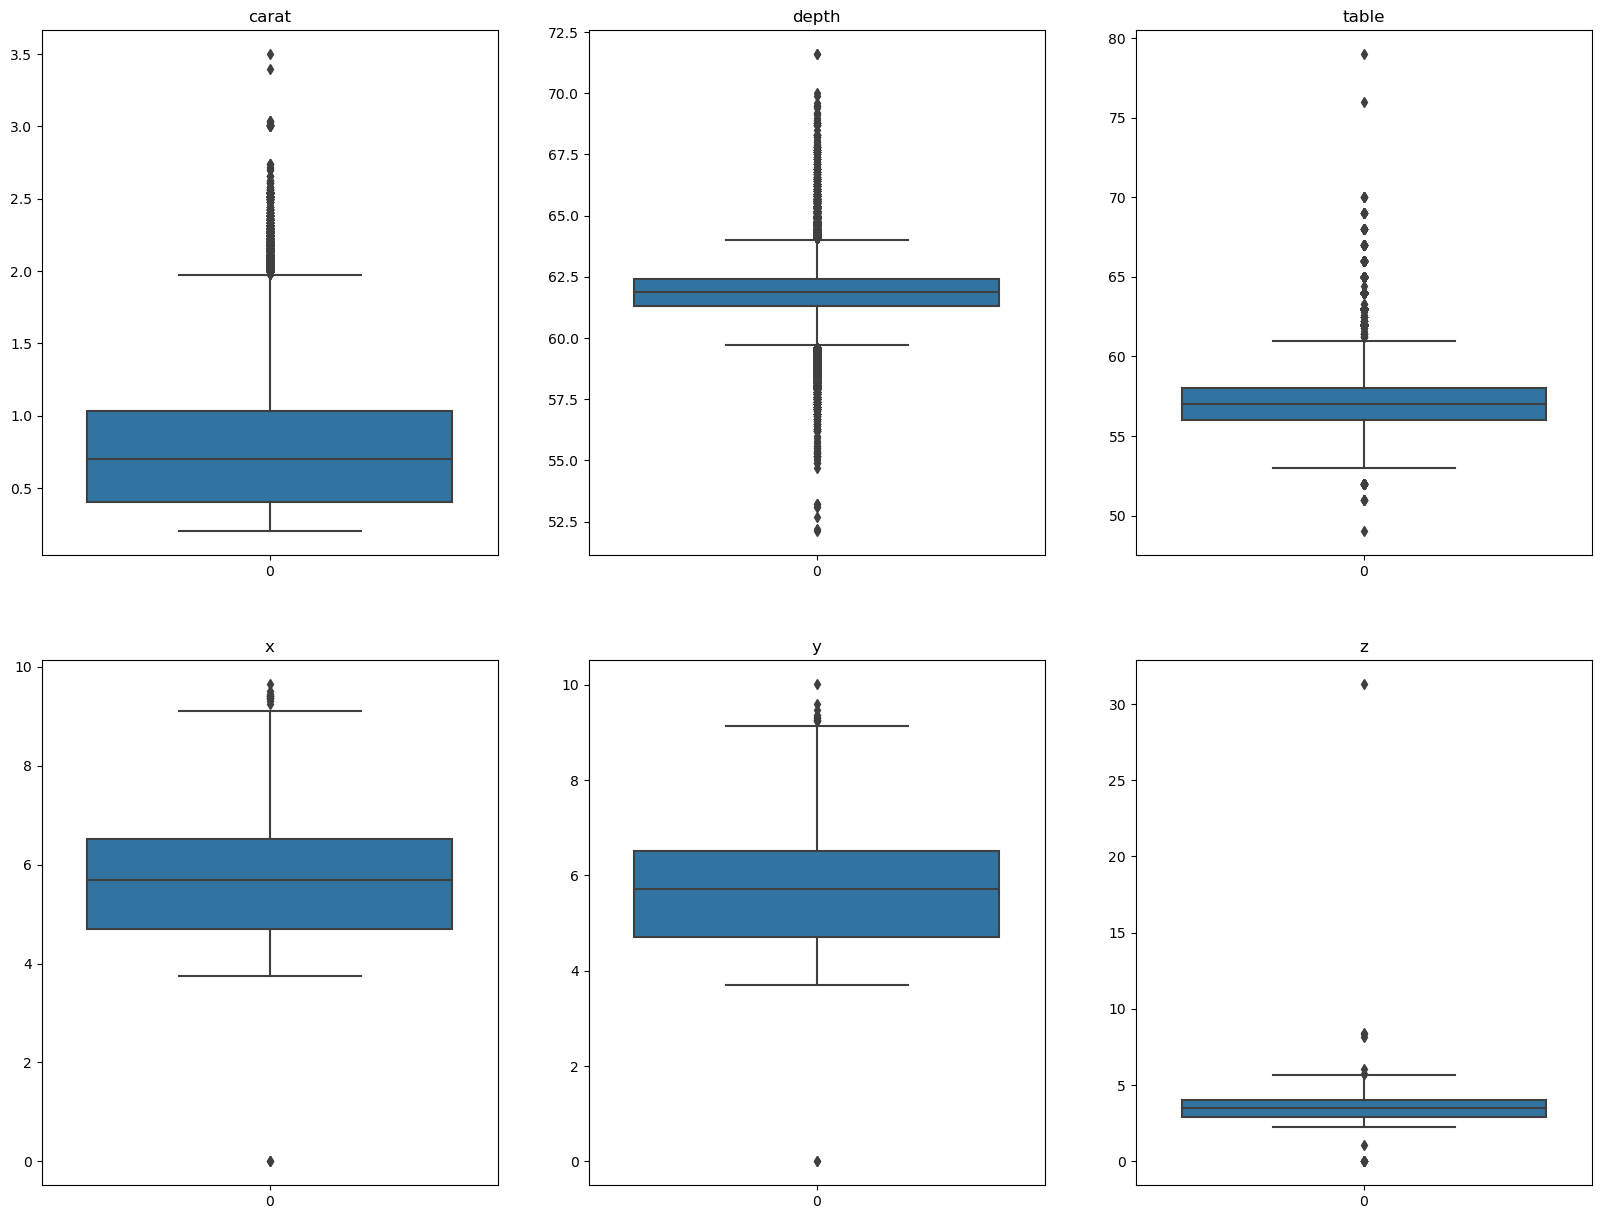

In [17]:
def plot_boxplot(data, colums, nrows, ncols):
    fig,axes = plt.subplots(nrows, ncols, figsize=(20,15))
    for cols , i in enumerate(colums):
        row, col = cols//ncols, cols%ncols
        sns.boxplot(data=data[i],ax=axes[row][col])
        axes[row][col].set_title(i)
        plt.show
        
plot_boxplot(df, colum, 2,3)

In [18]:
df = df[~(df.carat > 2.0)]
df = df[~(df.depth > 64)]
df = df[~(df.depth < 59.7)]
df = df[~(df.table > 61)]
df = df[~(df.table < 53)]
df = df[~(df.x > 9.3)]
df = df[~(df.x < 3)]
df = df[~(df.y > 9.3)]
df = df[~(df.y < 3)]
df = df[~(df.z > 6)]
df = df[~(df.z < 2)]

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cut = le.fit_transform(df.cut)
df.color = le.fit_transform(df.color)
df.clarity = le.fit_transform(df.clarity)

In [20]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
2,2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,4,6,2,62.8,58.0,7.34,7.29,4.59,7506
...,...,...,...,...,...,...,...,...,...,...,...
193567,193567,0.58,2,1,5,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,2,0,7,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,3,3,7,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,4,2,2,63.1,57.0,5.72,5.75,3.62,3036


In [21]:
x =df.drop(['id','price'], axis=1)
y =df.price

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df.drop(['id','price'], axis=1), df.price, train_size = 0.7)

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [24]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9766300869557547

In [25]:
mod1 = GradientBoostingRegressor()
mod1.fit(x_train,y_train)
mod1.score(x_test,y_test)

0.9741505914107652

In [26]:
test = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')
test.cut = le.fit_transform(test.cut)
test.color = le.fit_transform(test.color)
test.clarity = le.fit_transform(test.clarity)


xtest =test.drop('id', axis=1)

In [27]:
answer =  model.predict(xtest)
submission = pd.DataFrame(test.id)
submission['price'] = answer
submission.set_index('id', inplace=True)
submission.head()

,price
id,
193573,846.38
193574,2400.05
193575,2243.74
193576,916.78
193577,5620.16


In [28]:
submission.to_csv('submission.csv')